# Customizing Plot Legends

Las leyendas de la trama dan significado a una visualización, asignando significado a los distintos elementos de la trama.
Anteriormente vimos cómo crear una leyenda simple; aquí veremos cómo personalizar la ubicación y la estética de la leyenda en Matplotlib.

La leyenda más simple se puede crear con el comando ``plt.legend()``, que crea automáticamente una leyenda para cualquier elemento de la trama etiquetado:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

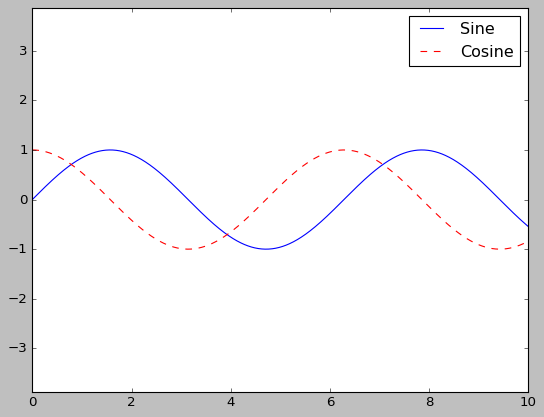

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

Pero hay muchas formas en las que podríamos personalizar esa leyenda. Por ejemplo, podemos especificar la ubicación y desactivar el marco:

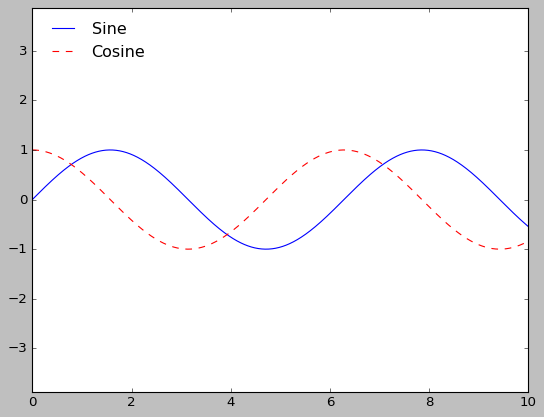

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

Podemos usar el comando ``ncol`` para especificar el número de columnas en la leyenda:

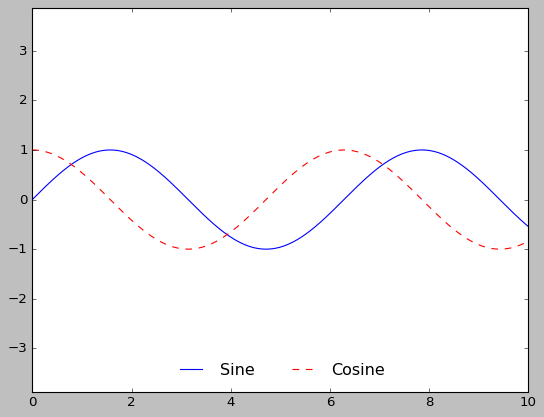

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

Podemos utilizar un cuadro redondeado (``fancybox``) o agregar una sombra, cambiar la transparencia (valor alfa) del marco o cambiar el relleno alrededor del texto:

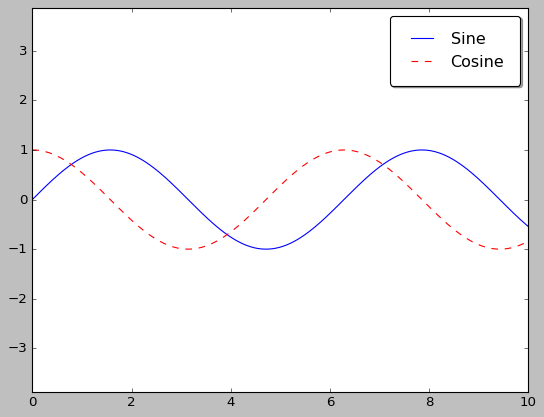

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

Para obtener más información sobre las opciones de leyenda disponibles, consulte la docstring de ``plt.legend``.

In [8]:
# help(plt.legend)

## Choosing Elements for the Legend

Como ya hemos visto, la leyenda incluye todos los elementos etiquetados de forma predeterminada.
Si esto no es lo que deseamos, podemos ajustar qué elementos y etiquetas aparecen en la leyenda utilizando los objetos devueltos por los comandos de trazado.
El comando ``plt.plot()`` puede crear varias líneas a la vez y devuelve una lista de instancias de línea creadas.
Al pasar cualquiera de estos a ``plt.legend()`` le indicaremos cuál identificar, junto con las etiquetas que nos gustaría especificar:

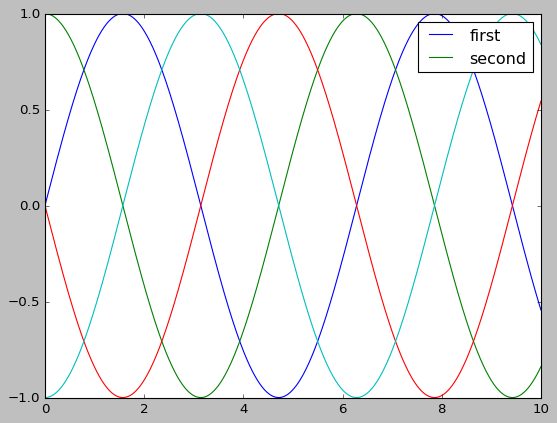

In [9]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines es una lista de instancias de plt.Line2D
plt.legend(lines[:2], ['first', 'second']);

Generalmente, en la práctica encuentro que es más claro utilizar el primer método, aplicando etiquetas a los elementos del gráfico que desea mostrar en la leyenda:

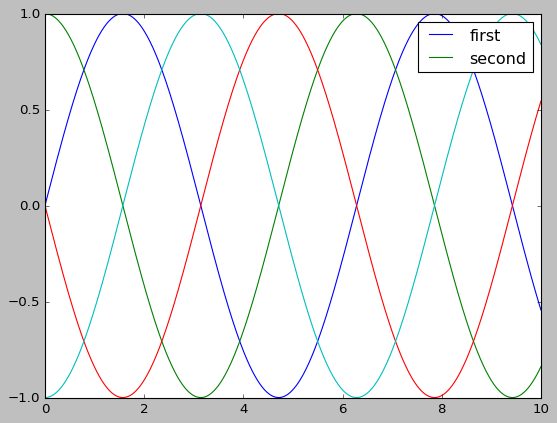

In [12]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Tenga en cuenta que, de forma predeterminada, la leyenda ignora todos los elementos sin un atributo ``etiqueta`` establecido.

## Legend for Size of Points

A veces, los valores predeterminados de la leyenda no son suficientes para la visualización dada.
Por ejemplo, tal vez esté utilizando el tamaño de los puntos para marcar ciertas características de los datos y desee crear una leyenda que refleje esto.
A continuación, se muestra un ejemplo en el que utilizaremos el tamaño de los puntos para indicar las poblaciones de las ciudades de California.
Nos gustaría una leyenda que especifique la escala de los tamaños de los puntos y lo lograremos trazando algunos datos etiquetados sin entradas:

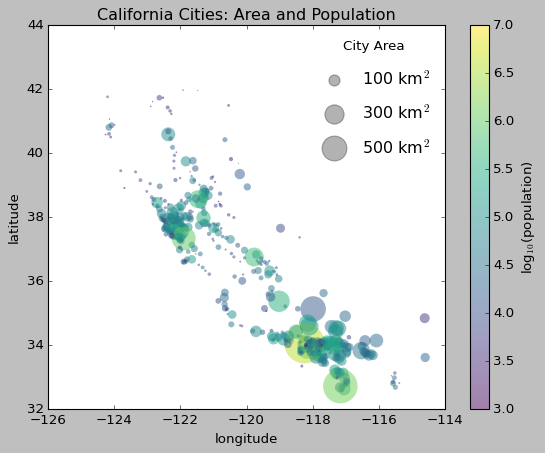

In [14]:
import pandas as pd
cities = pd.read_csv('../../data/california_cities.csv')

# Extraer los datos que nos interesan
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Dispersar los puntos, utilizando tamaño y color, pero sin etiqueta
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Aquí creamos una leyenda:
# Trazaremos listas vacías con el tamaño y la etiqueta deseados
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

La leyenda siempre hará referencia a algún objeto que se encuentre en el gráfico, por lo que si queremos mostrar una forma particular, debemos trazarla.
En este caso, los objetos que queremos (círculos grises) no están en el gráfico, por lo que los simulamos trazando listas vacías.
Observe también que la leyenda solo enumera los elementos del gráfico que tienen una etiqueta especificada.

Al trazar listas vacías, creamos objetos de gráfico etiquetados que son recogidos por la leyenda, y ahora nuestra leyenda nos brinda información útil.
Esta estrategia puede ser útil para crear visualizaciones más sofisticadas.

Finalmente, observe que para datos geográficos como este, sería más claro si pudiéramos mostrar los límites de los estados u otros elementos específicos del mapa.
Para esto, una excelente opción de herramienta es el kit de herramientas complementario Basemap de Matplotlib.

## Multiple Legends

A veces, al diseñar un gráfico, es posible agregar varias leyendas a los mismos ejes.
Lamentablemente, Matplotlib no facilita esta tarea: a través de la interfaz ``legend`` estándar, solo es posible crear una única leyenda para todo el gráfico.
Si intenta crear una segunda leyenda utilizando ``plt.legend()`` o ``ax.legend()``, simplemente anulará la primera.
Podemos solucionar este problema creando una "legend artist" desde cero y luego utilizando el método ``ax.add_artist()`` de nivel inferior para agregar manualmente el segundo artista al gráfico:

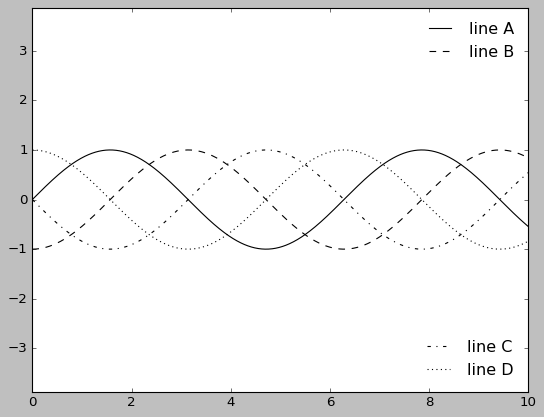

In [16]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')


# Especifica las líneas y las etiquetas de la primera leyenda
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Crea la segunda leyenda y agrega el artista manualmente.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

Este es un vistazo a los objetos de artista de bajo nivel que componen cualquier gráfico de Matplotlib.
Si examina el código fuente de ``ax.legend()`` (recuerde que puede hacer esto dentro del cuaderno de IPython usando ``ax.legend??``) verá que la función simplemente consiste en cierta lógica para crear un artista ``Legend`` adecuado, que luego se guarda en el atributo ``legend_`` y se agrega a la figura cuando se dibuja el gráfico.